# MCMC-MH 1D SHO Example

Here is an example of a one-dimensional simple harmonic oscillator using Metropolis Hastings Monte Carlo Markov Chains to retrieve the energy spectrum. Mass and hbar have been set to 1. You may rerun this notebook, but be aware that it is very slow and if you click the restart and run, the current set of figures will disappear for a while. These calculations are largely based on the notes of Dr. Colin Morningstar (Carnegie Mellon University).

## Analytic SHO

Calculate the classical path of SHO using discretized equation of motion

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.optimize as so

In [47]:
#set plot text color on parts that have a transparent background
text_color = "black"
params = {"ytick.color" : text_color,
          "xtick.color" : text_color,
          "axes.labelcolor" : text_color,
          "axes.edgecolor" : text_color,
         "axes.labelsize": 30,
          "figure.autolayout" : True,
         "font.size":20}
plt.rcParams.update(params)

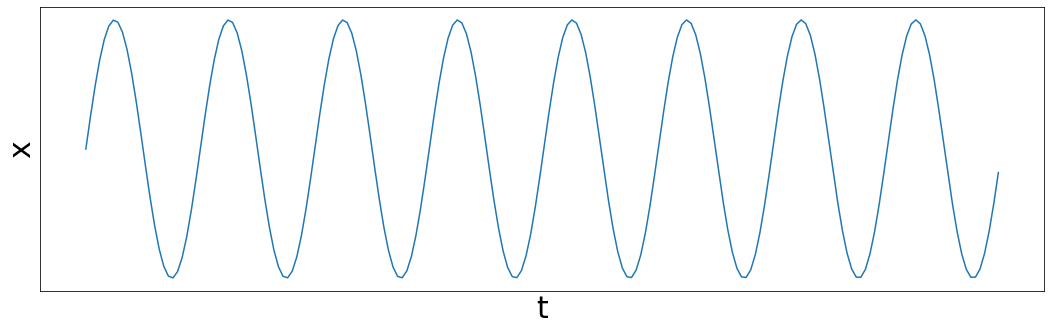

In [3]:
Nt = 200
t = np.linspace(0,9.99,Nt)
dt = t[1]-t[0]
omega = 5.
x0 = 0
v0 = 1.
x = []
initial_step = v0*dt+x0
x.append(x0)
x.append(initial_step)
for i in range(2,Nt):
    x.append((2-omega*omega*dt*dt)*x[-1]-x[-2])
plt.figure(figsize=(15, 5))
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.xticks([])
plt.yticks([])
plt.show()

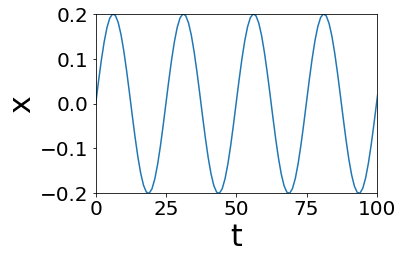

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from itertools import count
from IPython import display
x1=[]
y1=[]
initial_step = v0*dt+x0
x1.append(0)
x1.append(1)
y1.append(x0)
y1.append(initial_step)
i1 = count()
t=next(i1)
t=next(i1)

def animate1(j):
    t=next(i1)
    x1.append(t)
    y1.append((2-omega*omega*dt*dt)*y1[-1]-y1[-2])
    plt.cla()
    plt.xlim([0, Nt/2])
    plt.ylim([-0.2,0.2])
    plt.xlabel('t')
    plt.ylabel('x')
    plt.plot(x1,y1)
animation_2 = animation.FuncAnimation(plt.gcf(),animate1,interval=Nt)
video_2 = animation_2.to_html5_video()
html_code_2 = display.HTML(video_2)
display.display(html_code_2)
# plt.tight_layout()
plt.show()

In [5]:
#Hermite polynomials
def H(x, i):
    if i==0:
        return np.array([1]*len(x))
    elif i==1:
        return 2*x
    elif i==2:
        return 4*x*x-2
    elif i==3:
        return 8*x*x*x-12*x
    elif i==4:
        return 16*x*x*x*x-48*x*x+12

Plot the energy spectrum, steady state solutions, and potential of the SHO

([], [])

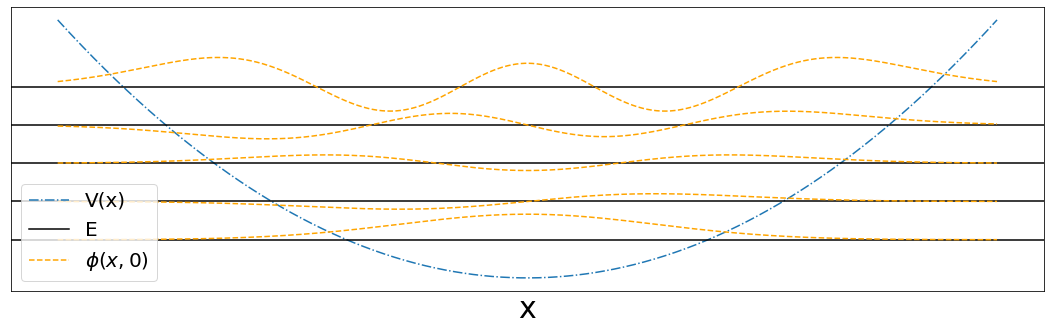

In [6]:
plt.figure(figsize=(15, 5))
x = np.linspace(-3,3,1000) #set domain
omega = 1.5 #set omega
V = 1/2*omega*omega*x*x #calculate potential energy
E = (np.array(range(0,5))+1)*omega #calculate energy spectrum
phi = H(np.sqrt(omega)*x,0)*np.exp(-omega/2.0*x*x)
plt.plot(x,V,linestyle="-.",label = "V(x)")
for i,energy in enumerate(E):
    if i==0:
        plt.axhline(energy,color='black',label = "E")
    else:
        plt.axhline(energy,color='black')
    #calculate the field and set it's zero to the energy level and set coefficient to something that 
        #looks good for the graph
    phi = 1/(3*i+1)*H(np.sqrt(omega)*x,i)*np.exp(-omega/2.0*x*x)+energy 
    if i==0:
        plt.plot(x,phi,color='orange',linestyle="--",label = r'$\phi(x,0)$')
    else:
        plt.plot(x,phi,color='orange',linestyle="--")
plt.legend(loc='lower left')
plt.xlabel('x')

plt.xticks([])
plt.yticks([])

# MCMHMC 1D SHO

Demonstrate possible quantum paths and their contribution to the transition amplitude and compare to analytically calculated classical path

In [7]:
#function that returns exp(-S) of a given path x on a lattice with spacing epsilon and length Nt
def calculate_contribution_to_transition_amplitude(Nt,x,epsilon):
    action = 0.0
    for j in range(Nt-1):
        action+=epsilon/2.0*(((x[j+1]-x[j])/epsilon)**2+omega*omega*((x[j+1]+x[j])/2.0)**2)
    return np.exp(-action)

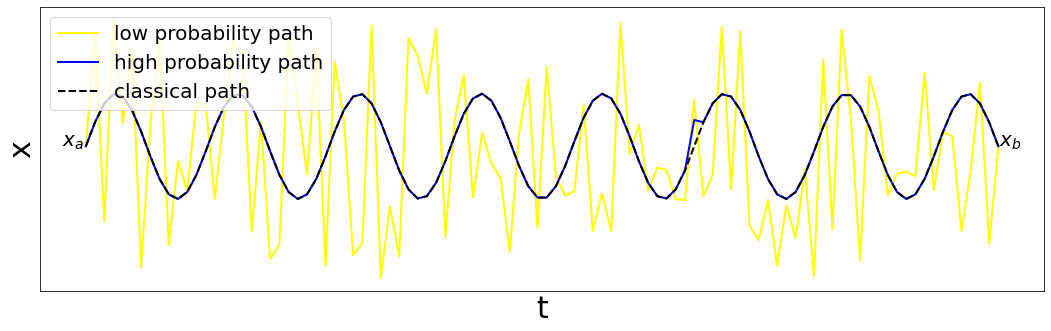

In [8]:
Nt = 100
omega = 5.
x0 = 0
v0 = 1.
t = np.linspace(0,9.4247,Nt)
dx = np.zeros(Nt)
dx[np.random.randint(int(Nt*0.5))+int(Nt*0.25)]+=0.1
classical_path = (v0/omega)*np.sin(omega*t)

random_path = np.random.rand(Nt)-0.5
random_path[0] = 0.0
random_path[Nt-1] = 0.0


plt.figure(figsize=(15, 5))

plt.plot(t, random_path, color = "yellow",label = "low probability path",lw=2)
plt.plot(t, (v0/omega)*np.sin(omega*t)+dx, color = "blue", label="high probability path",lw=2)
plt.plot(t, (v0/omega)*np.sin(omega*t), color = "black", label = "classical path", ls="dashed",lw=2)

plt.text(0-0.25,0,r"$x_a$")
plt.text(t[-1]+0.01,0,r"$x_b$")

plt.xlabel('t')
plt.ylabel('x')
plt.xticks([])
plt.yticks([])
plt.legend(loc="upper left")

plt.show()

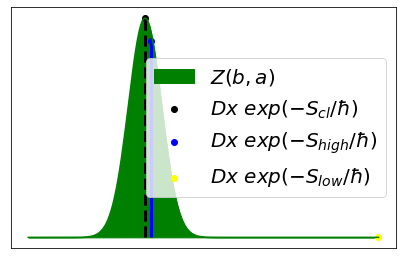

In [9]:
Np = 200
p=np.linspace(-5,10,Np)

classical_val = calculate_contribution_to_transition_amplitude(Nt,classical_path,t[1]-t[0] )
gauss = classical_val*np.exp( -p*p )
high_prob_val = calculate_contribution_to_transition_amplitude(Nt,classical_path+dx,t[1]-t[0] )
high_prob_pos = np.where(gauss>high_prob_val)
low_prob_val = calculate_contribution_to_transition_amplitude(Nt, random_path, t[1]-t[0])
low_prob_pos = np.where(gauss>low_prob_val)

plt.plot(p,gauss,color="green")
plt.fill_between(p, gauss, color='green',label=r"$Z(b,a)$")
plt.scatter(0,classical_val,color="black",label=r"$Dx \ exp(-S_{ cl }/\hbar)$")
plt.scatter(p[high_prob_pos[-1][-1]],high_prob_val,color="blue",label=r"$Dx \ exp(-S_{high}/\hbar)$")
plt.scatter(p[low_prob_pos[-1][-1]],low_prob_val,color="yellow",label=r"$Dx \ exp(-S_{low}/\hbar)$")
plt.vlines(0,0,classical_val,color="black",lw=3,ls="dashed")
plt.vlines(p[high_prob_pos[-1][-1]],0,high_prob_val,color="blue",lw=3)
plt.vlines(p[low_prob_pos[-1][-1]],0,low_prob_val,color="yellow",lw=3)
plt.legend()

plt.xticks([])
plt.yticks([])
plt.show()

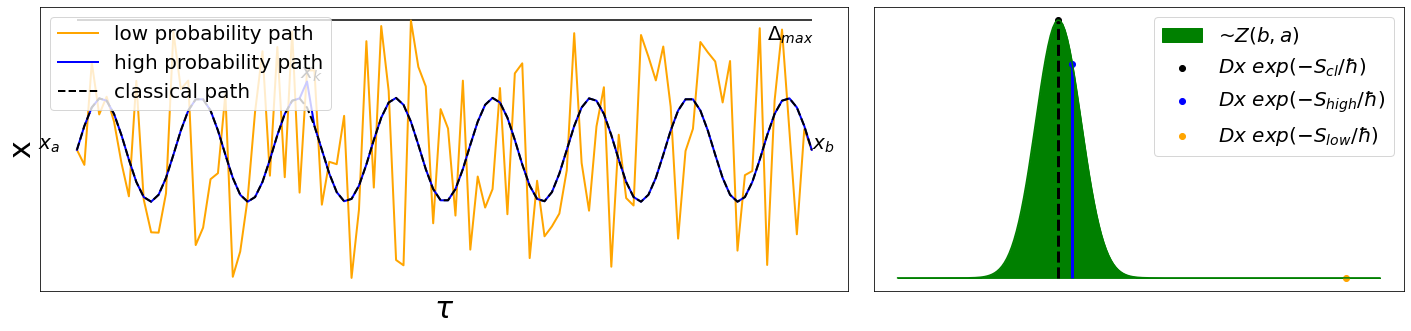

In [10]:
plt.figure(figsize=(20, 5))
plt.subplot(1,5,(1,3))
Nt = 100
t = np.linspace(0,9.4247,Nt)
dx = np.zeros(Nt)
k = np.random.randint(int(Nt*0.5))+int(Nt*0.25)
dx[k]+=0.1
omega = 5.
x0 = 0
v0 = 1.

classical_path = (v0/omega)*np.sin(omega*t)

random_path = np.random.rand(Nt)-0.5
random_path[0] = 0.0
random_path[Nt-1] = 0.0

plt.plot(t, random_path, color = "orange",label = "low probability path",lw=2)
plt.plot(t, (v0/omega)*np.sin(omega*t)+dx, color = "blue", label="high probability path",lw=2)
plt.plot(t, (v0/omega)*np.sin(omega*t), color = "black", label = "classical path", ls="dashed",lw=2)
plt.hlines(0.5,t[0],t[-1],color="black")
plt.text(t[93],0.5-0.08,r"$\Delta_{max}$")
plt.text(t[k-1],max((v0/omega)*np.sin(omega*t)+dx)+0.01,r"$x_k$")

plt.text(0-0.5,0,r"$x_a$")
plt.text(t[-1]+0.01,0,r"$x_b$")

plt.xlabel(r'$\tau$')
plt.ylabel('x')
plt.xticks([])
plt.yticks([])
plt.legend(loc="upper left")

plt.subplot(1,5,(4,5))
Np = 200
p=np.linspace(-5,10,Np)
classical_val = calculate_contribution_to_transition_amplitude(Nt,classical_path,t[1]-t[0] )
gauss = classical_val*np.exp( -p*p )
# classical_pos = np.where(gauss>classical_val)
high_prob_val = calculate_contribution_to_transition_amplitude(Nt,classical_path+dx,t[1]-t[0] )
high_prob_pos = np.where(gauss>high_prob_val)
low_prob_val = calculate_contribution_to_transition_amplitude(Nt, random_path, t[1]-t[0])
low_prob_pos = np.where(gauss>low_prob_val)


plt.plot(p,gauss,color="green")
plt.fill_between(p, gauss, color='green',label=r"~$Z(b,a)$")
plt.scatter(0.0,classical_val,color="black",label=r"$Dx \ exp(-S_{ cl }/\hbar)$")
plt.scatter(p[high_prob_pos[-1][-1]],high_prob_val,color="blue",label=r"$Dx \ exp(-S_{high}/\hbar)$")
plt.scatter(p[low_prob_pos[-1][-1]],low_prob_val,color="orange",label=r"$Dx \ exp(-S_{low}/\hbar)$")
plt.vlines(0.0,0,classical_val,color="black",lw=3,ls="dashed")
plt.vlines(p[high_prob_pos[-1][-1]],0,high_prob_val,color="blue",lw=3)
plt.vlines(p[low_prob_pos[-1][-1]],0,low_prob_val,color="orange",lw=3)
plt.legend()

plt.xticks([])
plt.yticks([])
plt.show()

## Begin Monte Carlo Calculations of possible paths

define important functions

In [11]:
#returns exp(-dS) for a path x with change delta at lattice location k. 
    #Nt is the length of the lattice and epsilon is the lattice spacing
def calculate_transition_probability(Nt,x,epsilon,delta,k):
    action=epsilon/2.0*( 2.0*(delta/epsilon)**2+0.5*(omega*delta)**2+(4.0*delta*x[k]-2.0*delta*x[k+1]-2.0*delta*x[k-1])/epsilon**2+0.5*(2.0*delta*x[k]+delta*x[k+1]+delta*x[k-1])*omega**2 )
    return np.exp(-action)

In [12]:
#perform number_of_sweeps iterations of the Metropolis hastings sweeps and returns the new path
#Nt-lattice length
#x-path
#epsilon-lattice spacing
#number_of_sweeps-number of MH sweeps
#max_delta- allowed range for suggested changes
def sweep(Nt, x, epsilon, number_of_sweeps = 1, max_delta=1.0):
    swept_x = x.copy()
    average_accept = 0.0
    total_accept = 0.0
    for j in range(0,number_of_sweeps):
        for i in range(1,Nt-1):
            suggested_change = np.random.rand()*2*max_delta-max_delta
            prob = min(calculate_transition_probability(Nt,swept_x,epsilon,suggested_change,i),1)
#             print(prob)
            total_accept+=1.0
#             this_rand = 
            if np.random.rand()<=prob:
                swept_x[i] = swept_x[i]+suggested_change
                average_accept+=1.0
    average_accept = average_accept/total_accept
#     print("Acceptance Percentage:",average_accept)
    return swept_x, average_accept

define a finer lattice and estimate "Delta" parameter

In [13]:
Nt = 1000
t = np.linspace(0,49.999,Nt)
omega = 5.
x0 = 0
v0 = 1.

random_path = np.random.rand(Nt)-0.5
random_path[0] = 0.0
random_path[Nt-1] = 0.0

deltas = np.linspace(0.01,1.0,100)
average_accept = np.zeros(len(deltas))
for i,delt in enumerate(deltas):
    one_sweep,average_accept[i] = sweep(Nt, random_path,t[1]-t[0],1, delt)

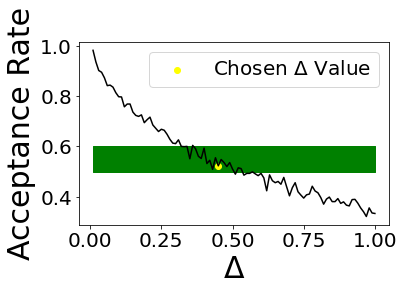

In [14]:
plt.plot(deltas,average_accept, color = "black")
plt.xlabel(r'$\Delta$')
plt.ylabel('Acceptance Rate')
chosen_delta = np.where(deltas>=0.45)
plt.fill_between(deltas, [0.5]*len(deltas), [0.6]*len(deltas), color='green')
plt.scatter(deltas[chosen_delta[0][0]],average_accept[chosen_delta[0][0]], color="yellow", label = r"Chosen $\Delta$ Value")
plt.legend()
max_delta = deltas[chosen_delta[0][0]]

In [15]:
#return a list of correlation function for each timestep to a max_t from a given path
#Nt-lattice length
#x-path
#max_t-largest tvalue to calculate the correlation function, sets the size of the output list
#epsilon-lattice spacing
def xNcorrelation(Nt, x, max_t, power, epsilon):
    Ct = list()
    for t in range(0,max_t):
        Ct.append(0.0)
        for i in range(0,Nt-t):
            Ct[-1] += (x[i]**power)*(x[i+t]**power)
        Ct[-1] = Ct[-1]/(Nt-t)
    return Ct

Estimate how many sweeps before measuring configurations

In [16]:
cxx5_cold = list()
cxx5_hot = list()
cold_start = np.zeros(Nt)
Nburns = np.array(list(range(1,301,25)))
for i in Nburns:
    print("burn", i)
    cxx5_cold.append(0.0)
    cxx5_hot.append(0.0)
    for j in range(15):
        random_path = np.random.rand(Nt)-0.5
        random_path[0] = 0.0
        random_path[Nt-1] = 0.0
        burnt_path_cold,av = sweep(Nt, cold_start,t[1]-t[0], i, max_delta)
        Cxx_cold = xNcorrelation(Nt, burnt_path_cold, 1, 1,t[1]-t[0])
        cxx5_cold[-1]+=Cxx_cold[0]
        burnt_path_hot,av = sweep(Nt, random_path,t[1]-t[0], i, max_delta)
        Cxx_hot = xNcorrelation(Nt, burnt_path_hot, 1, 1,t[1]-t[0])
        cxx5_hot[-1]+=Cxx_hot[0]

burn 1
burn 26
burn 51
burn 76
burn 101
burn 126
burn 151
burn 176
burn 201
burn 226
burn 251
burn 276


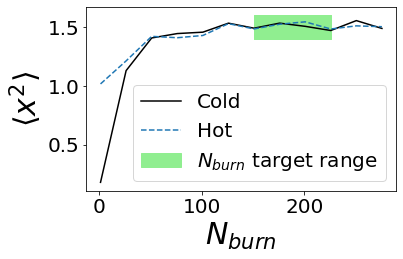

In [17]:
plt.plot(Nburns,cxx5_cold,label="Cold",color="black")
plt.plot(Nburns,cxx5_hot,label="Hot",ls="dashed")
plt.xlabel(r"$N_{burn}$")
plt.ylabel(r'$\left \langle x^2 \right \rangle$')
Good_values = Nburns[np.where(Nburns>150)[0][0]:np.where(Nburns>250)[0][0]]
plt.fill_between(Good_values, [1.6]*len(Good_values), [1.4]*len(Good_values), color='lightgreen', label=r"$N_{burn}$ target range")
# plt.yticks([])
plt.legend()
# plt.plot(cxx5_cold_average)

Estimate number of sweeps to perform between each measurement

In [18]:
#returns the autocorrelation of given set of observables calculated from the configurations
def calc_auto_correlation( data ):
    summ = 0.0
    quad_sum = 0.0
    for i in range( 0, len(data) ):
        summ = summ + data[i]
        quad_sum = quad_sum + data[i]*data[i]
    summ = summ/len(data)
    quad_sum = quad_sum/len(data)
    corr_sum = 0.0
    for i in range( 0, len(data)-1):
        corr_sum = corr_sum + data[i]*data[i+1]
    corr_sum = corr_sum/(len(data)-1)
    return ( corr_sum - summ*summ )/(quad_sum - summ*summ )

In [19]:
cold_start = np.zeros(Nt)
N_burn = 200
Nsweeps = np.array(list(range(1,152,15)))
autocorrelation = list()
for n in Nsweeps:
    new_path, av = sweep(Nt, cold_start,t[1]-t[0],N_burn, max_delta )
    cxx5_auto = list()
    for i in range(200):
        new_path, av = sweep(Nt, new_path,t[1]-t[0],n, max_delta )
        Cxx = xNcorrelation(Nt, new_path, 1, 1, t[1]-t[0])
        cxx5_auto.append(Cxx[-1])
    autocorrelation.append(calc_auto_correlation(cxx5_auto))
    print("Nsweeps",n,autocorrelation[-1])
    

Nsweeps 1 0.7270784272598007
Nsweeps 16 0.46322138053140066
Nsweeps 31 0.09436344705442844
Nsweeps 46 0.18060571794119942
Nsweeps 61 0.2377568773527677
Nsweeps 76 0.24343420996780782
Nsweeps 91 -0.057759218292409736
Nsweeps 106 -0.24963658854294427
Nsweeps 121 0.18403906696417027
Nsweeps 136 -0.21030295057112836
Nsweeps 151 -0.03652472635124877


Text(0, 0.5, 'autocorrelation')

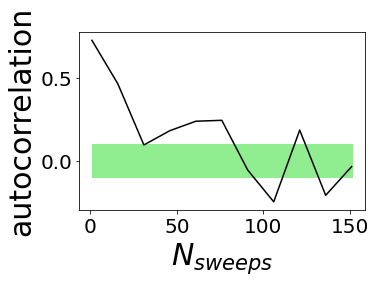

In [20]:
plt.plot(Nsweeps,autocorrelation,color = "black")
plt.fill_between(Nsweeps, [-0.1]*len(Nsweeps), [0.1]*len(Nsweeps), color='lightgreen')
plt.xlabel(r"$N_{sweeps}$")
plt.ylabel('autocorrelation')

take a quick look at some of the paths

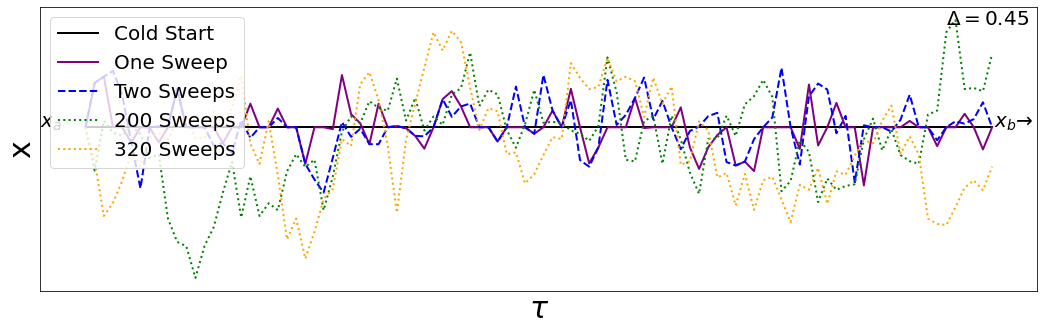

In [21]:
Nt = 1000
t = np.linspace(0,49.999,Nt)
max_delta = 0.45
cold_start = np.zeros(Nt)
cold_start_val = calculate_contribution_to_transition_amplitude(Nt,cold_start,t[1]-t[0] )
one_sweep,av = sweep(Nt, cold_start,t[1]-t[0],1, max_delta )
one_sweep_val = calculate_contribution_to_transition_amplitude(Nt,one_sweep,t[1]-t[0] )
two_sweeps,av = sweep(Nt, one_sweep,t[1]-t[0],1, max_delta )
two_sweep_val = calculate_contribution_to_transition_amplitude(Nt,two_sweeps,t[1]-t[0] )
N_burn = 200
N_sweep = 120
burn_sweeps,av = sweep(Nt, cold_start,t[1]-t[0], N_burn, max_delta)
double_burn_sweeps, av = sweep(Nt, burn_sweeps,t[1]-t[0], N_sweep, max_delta)
omega = 5.
x0 = 0
v0 = 1.

random_path = np.random.rand(Nt)-0.5
random_path[0] = 0.0
random_path[Nt-1] = 0.0
plt.figure(figsize=(15, 5))

plt.plot(t[0:100], cold_start[0:100], color = "black",label = "Cold Start",lw=2)
plt.plot(t[0:100], one_sweep[0:100], color = "purple", label="One Sweep",lw=2)
plt.plot(t[0:100], two_sweeps[0:100], color = "blue", label = "Two Sweeps", ls="dashed",lw=2)
plt.plot(t[0:100], burn_sweeps[0:100], color = "green", label = f"{N_burn} Sweeps", ls="dotted",lw=2)
plt.plot(t[0:100], double_burn_sweeps[0:100], color = "orange", label = f"{N_burn+N_sweep} Sweeps", ls="dotted",lw=2)
# plt.plot(t, classical_path, color = "yellow", label = f"Classical path", ls="dotted",lw=2)

plt.text(0-0.25,0,r"$x_a$")
plt.text(t[99]+0.01,0,r"$x_b \to$")
plt.text(t[94],max(burn_sweeps[0:100])*0.95, rf"$\Delta = ${max_delta}")

plt.xlabel(r'$\tau$')
plt.ylabel('x')
plt.xticks([])
plt.yticks([])
plt.legend(loc="upper left")

plt.show()

This is actual markov chain that computes the configurations that is used for the results. This is slow.

In [22]:
new_path, av = sweep(Nt, cold_start,t[1]-t[0],N_burn, max_delta )
samplings = list()
for i in range(600):
    if i%50==0:
        print(i)
    new_path, av = sweep(Nt, new_path,t[1]-t[0],N_sweep, max_delta )
    samplings.append(new_path)

0
50
100
150
200
250
300
350
400
450
500
550


Calculate correlator functions from configurations

In [23]:
maxt = 40
Cxxxxxx_average = np.zeros(maxt)
Cxxxx_average = np.zeros(maxt)
Cxx_average = np.zeros(maxt)
Cx_average = 0.0
for sample in samplings:
    Cxxxxxx_average += xNcorrelation(Nt, sample, maxt,3,t[1]-t[0])
    Cxxxx_average += xNcorrelation(Nt, sample, maxt,2,t[1]-t[0])
    Cxx_average += xNcorrelation(Nt, sample, maxt,1,t[1]-t[0])
    Cx_average+=np.average(sample)

In [24]:
Cxxxxxxxx_average = np.zeros(maxt)
for sample in samplings:
    Cxxxxxxxx_average += xNcorrelation(Nt, sample, maxt,4,t[1]-t[0])

In [25]:
Cx10_average = np.zeros(maxt)
for sample in samplings:
    Cx10_average += xNcorrelation(Nt, sample, maxt,5,t[1]-t[0])

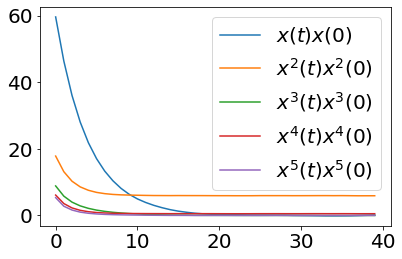

In [26]:
plt.plot(Cxx_average,label=r"$x(t)x(0)$")
plt.plot(Cxxxx_average,label=r"$x^2(t)x^2(0)$")
plt.plot(Cxxxxxx_average,label=r"$x^3(t)x^3(0)$")
plt.plot(Cxxxxxxxx_average,label=r"$x^4(t)x^4(0)$")
plt.plot(Cx10_average,label=r"$x^5(t)x^5(0)$")
plt.legend()

In [27]:
#returns the effective energy function computed from the correlator
def effective_energy(Ct):
    e = np.zeros(len(Ct)-1)
    for i in range(len(Ct)-1):
        ratio = (Ct[i])/(Ct[i+1])
        if ratio>=0.0:
            e[i] = np.log(ratio)/(t[1]-t[0])
        else:
            e[i] = None
    return e

look at the effective energy plots

In [28]:
E1 = effective_energy(Cxx_average)
E2 = effective_energy(Cxxxx_average)
E3 = effective_energy(Cxxxxxx_average)
E4 = effective_energy(Cxxxxxxxx_average)
E5 = effective_energy(Cx10_average)

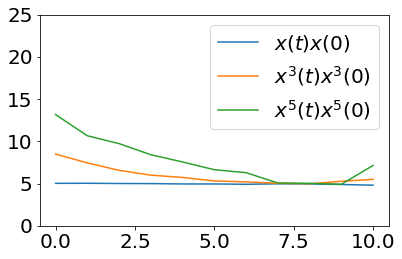

In [29]:
plot_max = 11
plt.plot(E1[:plot_max],label=r"$x(t)x(0)$")
# plt.plot(E2[:plot_max],label=r"$x^2(t)x^2(0)$")
plt.plot(E3[:plot_max],label=r"$x^3(t)x^3(0)$")
# plt.plot(E4[:plot_max],label=r"$x^4(t)x^4(0)$")
plt.plot(E5[:plot_max],label=r"$x^5(t)x^5(0)$")
# plt.plot(E7[:plot_max],label=r"$x^7(t)x^7(0)$")
tmin=0
tmax=11
level1 = np.average(E1[tmin:tmax])
# plt.hlines(level1,tmin,tmax-1,color="black")
plt.ylim(0,25)
plt.legend()

Perform fits to get the leading energies. Very fickle. May have to adjust the guesses or run more configurations.

In [30]:
def FirstExp(x, m, aEff):
    return m * np.exp(-aEff * x)

In [31]:
p0 = (50, 5) # start with values near those we expect
params, cv = so.curve_fit(FirstExp, list(range(len(Cxx_average))), Cxx_average, p0)
C1A1, C1E1 = params

<ipython-input-30-da2a82b6b1f6>:2: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-aEff * x)


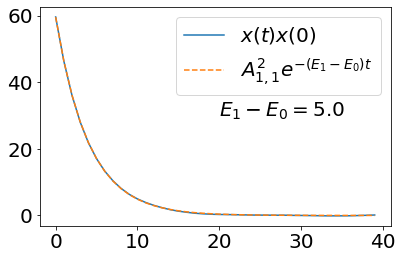

In [32]:
E1minusE0 = round(C1E1/(t[1]-t[0]),2)
plt.plot(Cxx_average,label=r"$x(t)x(0)$")
plt.plot(FirstExp(np.array(list(range(len(Cxx_average)))),C1A1,C1E1),label=r"$A_{1,1}^2 e^{-(E_1-E_0)t}$",ls="dashed")
plt.text(len(Cxx_average)/2,  max(Cxx_average)/2, rf"$E_1-E_0 = {E1minusE0}$")

plt.legend()

In [33]:
def SecondExp(x, A1, A2, E2): #, A3, Delta):
    return  A1 * np.exp(-C1E1 * x) + A2 * np.exp(-E2 * x) # + A3 * np.exp(-Delta * x)

In [34]:
def FirstExpC(x, m, aEff , C):
    return m * np.exp(-aEff * x) + C
def SecondExpC(x, A1, A2, E2, C): #, A3, Delta):
    return  A1 * np.exp(-C1E1 * x) + A2 * np.exp(-E2 * x) + C

In [35]:
p0 = (C1A1, C1E1, Cxxxx_average[-1]) # start with values near those we expect
params, cv = so.curve_fit(FirstExpC, list(range(len(Cxxxx_average))), Cxxxx_average, p0)
C22A1, C22E1, C22C = params
print(params)

[11.88209385  0.5012547   5.95036776]


In [36]:
p0 = (C22A1, C22A1/2, C1E1*2, C22C) #, 0.0, C1E1*3) # start with values near those we expect
params, cv = so.curve_fit(SecondExpC, list(range(len(Cxxxx_average))), Cxxxx_average, p0,maxfev = 2000)
C22A1, C22A2, C22E2, C22C = params #, A3, E3 = params
print(params)

[ 0.50016176 11.40750806  0.51852775  5.94251984]


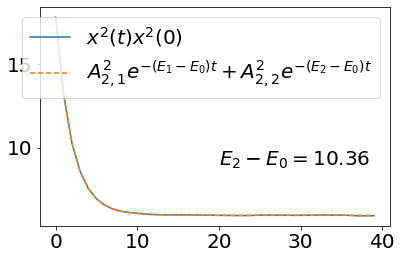

In [37]:
E22minusE0 = round(C22E2/(t[1]-t[0]),2)
plt.plot(Cxxxx_average,label=r"$x^2(t)x^2(0)$")

plt.plot(SecondExpC(np.array(list(range(len(Cxxxx_average)))),C22A1, C22A2, C22E2, C22C),label=r"$A_{2,1}^2 e^{-(E_1-E_0)t} +A_{2,2}^2 e^{-(E_2-E_0)t}$",ls="dashed")
plt.text(len(Cxxxx_average)/2,  max(Cxxxx_average)/2, rf"$E_2-E_0 = {E22minusE0}$")

plt.legend()

In [38]:
def ThirdExp(x, A1, A2, A3, E3):
    return  A1 * np.exp(-C1E1 * x) + A2 * np.exp(-C22E2 * x) + A3 * np.exp(-E3 * x) 

In [39]:
p0 = (C1A1, C1E1) # start with values near those we expect
params, cv = so.curve_fit(FirstExp, list(range(len(Cxxxxxx_average))), Cxxxxxx_average, p0)
C3A1, C3E1 = params
print(params)

[8.5757714  0.34706737]


In [40]:
tmin=0
tmax=len(Cxxxxxx_average)
p0 = (C3A1, C3A1/2, C1E1*2) #, 0.0, C1E1*3) # start with values near those we expect
params, cv = so.curve_fit(SecondExp, list(range(len(Cxxxxxx_average)))[tmin:tmax], Cxxxxxx_average[tmin:tmax], p0,maxfev = 2000)
C3A1, C3A2, C3E2 = params #, A3, E3 = params
print(params)

[5.32199763 3.54756528 0.76028221]


In [41]:
p0 = (C3A1, C3A2, C3A2/2, C1E1*3) # start with values near those we expect
params, cv = so.curve_fit(ThirdExp, list(range(len(Cxxxxxx_average))), Cxxxxxx_average, p0,maxfev = 2000)
C3A1, C3A2, C3A3, C3E3 = params
print(params)

[5.1823737  1.20198593 2.48801622 0.87026924]


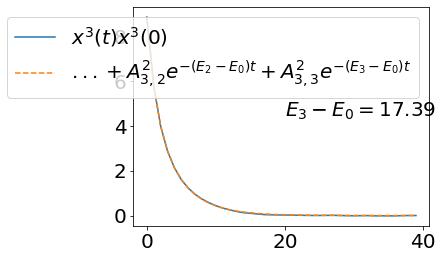

In [42]:
E3minusE0 = round(C3E3/(t[1]-t[0]),2)
plt.plot(Cxxxxxx_average,label=r"$x^3(t)x^3(0)$")

plt.plot(ThirdExp(np.array(list(range(len(Cxxxxxx_average)))),C3A1, C3A2, C3A3, C3E3),label=r"$... +A_{3,2}^2 e^{-(E_2-E_0)t}+A_{3,3}^2 e^{-(E_3-E_0)t}$",ls="dashed")
plt.text(len(Cxxxxxx_average)/2,  max(Cxxxxxx_average)/2, rf"$E_3-E_0 = {E3minusE0}$")

plt.legend()

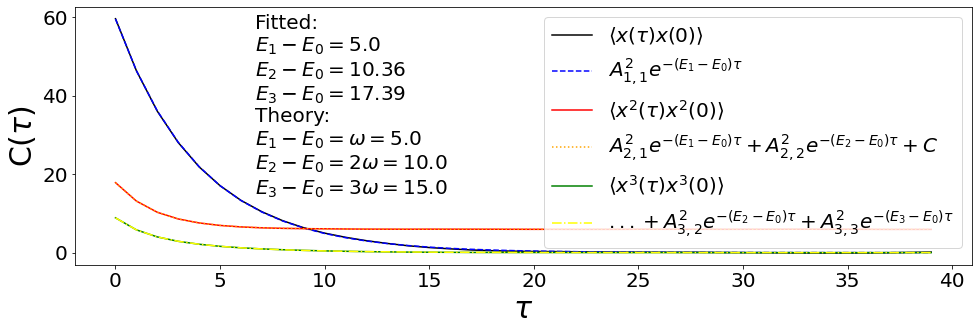

In [48]:
E1minusE0 = round(C1E1/(t[1]-t[0]),2)
E22minusE0 = round(C22E2/(t[1]-t[0]),2)
E3minusE0 = round(C3E3/(t[1]-t[0]),2)
text = rf"""Fitted:
$E_1-E_0 = {E1minusE0}$
$E_2-E_0 = {E22minusE0}$
$E_3-E_0 = {E3minusE0}$
"""
text2 = rf"""Theory:
$E_1-E_0 = \omega = {omega}$
$E_2-E_0 = 2\omega = {2*omega}$
$E_3-E_0 = 3\omega = {3*omega}$
"""
plt.figure(figsize=(14, 5))
plt.xlabel(r"$\tau$")
plt.ylabel(r"C($\tau$)")

plt.plot(Cxx_average,label=r"$\langle x(\tau)x(0) \rangle$", color="black")
plt.plot(FirstExp(np.array(list(range(len(Cxx_average)))),C1A1,C1E1),label=r"$A_{1,1}^2 e^{-(E_1-E_0)\tau}$",ls="dashed", color = "blue")
plt.text(len(Cxx_average)/6,  max(Cxx_average)*0.55, text) #rf"$E_1-E_0 = {E1minusE0}$")
plt.text(len(Cxx_average)/6,  max(Cxx_average)*0.15, text2)

plt.plot(Cxxxx_average,label=r"$\langle x^2(\tau)x^2(0) \rangle$", color = "red")

plt.plot(SecondExpC(np.array(list(range(len(Cxxxx_average)))),C22A1, C22A2, C22E2, C22C),label=r"$A_{2,1}^2 e^{-(E_1-E_0)\tau} +A_{2,2}^2 e^{-(E_2-E_0)\tau}+C$",ls="dotted", color="orange")
# plt.text(len(Cxxxx_average)/2,  max(Cxxxx_average)/2, rf"$E_2-E_0 = {E22minusE0}$")
plt.plot(Cxxxxxx_average,label=r"$\langle x^3(\tau)x^3(0) \rangle$", color="green")

plt.plot(ThirdExp(np.array(list(range(len(Cxxxxxx_average)))),C3A1, C3A2, C3A3, C3E3),label=r"$... +A_{3,2}^2 e^{-(E_2-E_0)\tau}+A_{3,3}^2 e^{-(E_3-E_0)\tau}$",ls="-.", color="yellow")
# plt.text(len(Cxxxxxx_average)/2,  max(Cxxxxxx_average)/2, rf"$E_3-E_0 = {E3minusE0}$")
plt.legend()